# KNN Example - MNIST
### Recognize the images of hand-written digits in MNIST dataset

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, metrics
from sklearn.cross_validation import train_test_split

C:\Users\doris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Step 1: Loading data

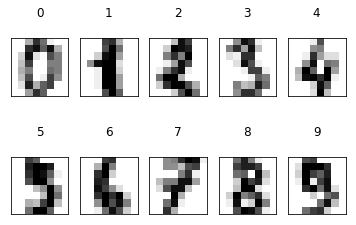

In [2]:
# Load MNIST data
digits = datasets.load_digits()

# show the first 10 images
fig, ax = plt.subplots(2, 5, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(5):
    for i in range(2):
        index = i*5+j
        im = ax[i, j].imshow(digits.images[index], cmap=plt.cm.binary, interpolation='nearest')
        ax[i, j].set_title('%i\n'%index)
        im.set_clim(0, 16)
plt.show()

### Step 2: Data preparation 

In [3]:
mnist_label = digits.target
mnist_image = digits.images

# reshape the images into arrays
mnist_data = digits.images.reshape((len(mnist_image), -1))

# split training and testing data
X_train, X_test, y_train, y_test, train_images, test_images = train_test_split(mnist_data, mnist_label, mnist_image, test_size = 0.25)

### Step 3: Finding the best K

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The optimal number of neighbors is 3


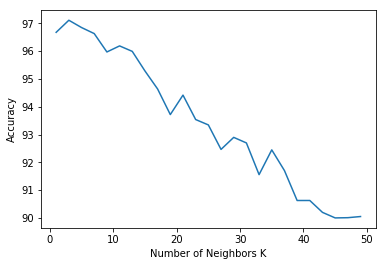

In [4]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbor = list(filter(lambda x: x % 2 != 0, myList))

print(neighbor)

# empty list that will hold cv scores
cv_scores = []

import sklearn.cross_validation as cross_validation

# perform 10-fold cross validation
for k in neighbor:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validation.cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean()*100)

# determining best k
optimal_k = neighbor[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbor, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

### Step 4: KNN training and testing

In [5]:
# KNN classifier declaration
knn = neighbors.KNeighborsClassifier(n_neighbors = optimal_k)

# Fit the model using X_train as training data and y_train as target values
knn.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = knn.predict(X_test)

# Compute accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.986666666667


# KNN Aplication - NASA Aircrafts (Try yourself!)

### Given the aircraft engines operation and failure events history from NASA, can we use KNN to predict whether an in-service engine fails in 60 cycles? 

In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import neighbors, metrics

### Step 1: Data preparation
#### training data link:  https://drive.google.com/file/d/1hzQUEvjyDe9m30vp7S0ABh-ZtQtjfsN-/view?usp=sharing<br /> testing data link:  https://drive.google.com/file/d/1eQoVF9vGtCx75qy2sFrhj9gVA5GXYLL6/view?usp=sharing

In [7]:
# Read data from the given .csv files
train_file = pd.read_csv('train.csv')
valid_file = pd.read_csv('valid.csv')

# Pick out the needed data columns
train_df = train_file[train_file.columns[1:27]]
valid_df = valid_file[valid_file.columns[1:27]]

# Split the training data and RUL
# RUL: Remaining Useful Life
X_train, train_RUL = train_df.iloc[:,0:25], train_df.iloc[:,25]
X_valid, valid_RUL = valid_df.iloc[:,0:25], valid_df.iloc[:,25]

# Trun the RUL into target values (if RUL>=60->0, else->1)   (hint: np.where)
y_train = np.where(train_RUL<60,1,0)
y_valid = np.where(valid_RUL<60,1,0)


### Step 2: KNN training and testing

In [8]:
# KNN classifier declaration
knn = neighbors.KNeighborsClassifier(n_neighbors=8)

# Fit the model using X_train as training data and y_train as target values
knn.fit(X_train,y_train)

# Predict the class labels for the testing data
y_pred = knn.predict(X_valid)

# Compute accuracy of the classifier
accuracy = metrics.accuracy_score(y_valid, y_pred)
print('accuracy: ',accuracy)

accuracy:  0.94242516799


### Step 3: Save the predicted results

In [9]:
valid_file['valid_RUL'] = y_valid
valid_file['pred'] = y_pred
valid_file.to_csv('predicted_output.csv')
print('output file saved')

output file saved
